# Reto 1

In [18]:
# Se importa la clase MNIST

from tensorflow.keras.datasets import mnist 
#tf.__version__

In [19]:
# Se descargan los datos y se guardan en variables

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print(f'Las dimensiones de los datos de entrenamiento son {X_train.shape}')
print(f'Las dimensiones de los etiquetas de entrenamiento son {y_train.shape}')
print(f'Las dimensiones de los datos de prueba son {X_test.shape}')
print(f'Las dimensiones de los etiquetas de prueba son {y_test.shape}') 

Las dimensiones de los datos de entrenamiento son (60000, 28, 28)
Las dimensiones de los etiquetas de entrenamiento son (60000,)
Las dimensiones de los datos de prueba son (10000, 28, 28)
Las dimensiones de los etiquetas de prueba son (10000,)


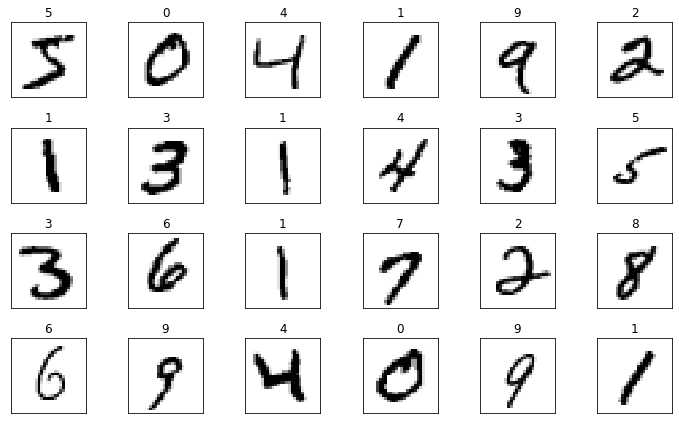

In [21]:
# Se grafican alguna de las imagenes del dataset de manera aleatoria 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 6))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([]) 
    axes.set_title(target)
plt.tight_layout()

# Reto 2

In [22]:
# Se modifica las dimensiones del dato para coincidir con el formato
# (Datos, ancho, largo, canales)

X_train = X_train.reshape((60000, 28, 28, 1)) 
X_test = X_test.reshape((10000, 28, 28, 1))
print(f'Las dimensiones del conjunto de entrenamiento es {X_train.shape}')

Las dimensiones del conjunto de entrenamiento es (60000, 28, 28, 1)


In [23]:
# Se normalizan los datos. Los algortimos de deep learning presentan 
# un mejor rendimiento si trabajan con datos entre 0 y 1

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [24]:
# Se import el módulo utils para la codificacion One-Hot de las etiquetas 

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
print(f'Las dimensiones de las etiquetas son {y_train.shape}')
print(f'Las primeras 5 etiquetas son: ')
for i in range(5):
  print(f'{y_train[i]}\n')

Las dimensiones de las etiquetas son (60000, 10)
Las primeras 5 etiquetas son: 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]



# Reto 3

In [26]:
# Se importa la clase Sequential
from tensorflow.keras.models import Sequential  

In [27]:
# Instanciación de un objeto que sera la red neuronal
cnn = Sequential()

In [28]:
# Se importan las clases que definen las capas de la red
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [29]:
# Se añaden capas a la red neuronal convolucional
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [31]:
# Se presenta la estructura final de la red
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [32]:
# Se definen el optimizador, la función de costo y la metrica de la red
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [33]:
# Se entrena la red 
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 77s 91ms/step - loss: 0.1478 - accuracy: 0.9537 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 2/5
844/844 [==============================] - 75s 89ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 3/5
844/844 [==============================] - 73s 87ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 74s 88ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 73s 87ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0362 - val_accuracy: 0.9897


# Reto 4

In [34]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Función de pérdida: {loss}  Exactitud: {accuracy}')

313/313 [==============================] - 6s 20ms/step - loss: 0.0349 - accuracy: 0.9889
Función de pérdida: 0.034852735698223114  Exactitud: 0.9889000058174133


In [35]:
# Predicciónes de la red neuronal para todos los datos de prueba
predictions = cnn.predict(X_test)

In [45]:
# Etiqueta del primer dato en el conjunto de prueba
y_test[0]

# Predicciones de la red neuronal convolucional del primer dato
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000011806%
1: 0.0000000334%
2: 0.0000218288%
3: 0.0001067969%
4: 0.0000000065%
5: 0.0000003448%
6: 0.0000000000%
7: 99.9998569489%
8: 0.0000000562%
9: 0.0000069583%


In [37]:
# Se guardan en un arreglo las imagenes que no se 
# predijeron de forma correcta y la imagenes
# se les aplica un reshape()

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], 
                                      predicted, expected))

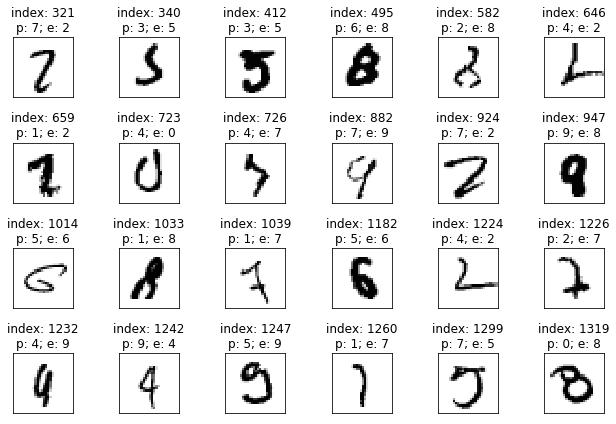

In [38]:
# Se grafican aquellas predicciones incorrectas
# con su correspondinte valor esperado
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(9, 6))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [39]:
# Función para mostrar las salidas de probabilidad 
# para cada una de las categorias 
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [40]:
display_probabilities(predictions[659])

0: 0.0002375592%
1: 57.2032570839%
2: 4.3458383530%
3: 0.0148863634%
4: 0.0013649341%
5: 0.0001899520%
6: 0.0000007232%
7: 38.4318739176%
8: 0.0003426651%
9: 0.0020164724%


In [41]:
# Se guarda el modelo generado
cnn.save('mnist_cnn.h5') 